In [1]:
import pandas as pd
import numpy as np
from twarc import Twarc
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("retweet_June_28_20_20_hydrated.csv")

In [14]:
access_token = "1241834718041079813-0B4rNE3kxH0UqwGQjnmj5ev1COe5Ai"
access_token_secret = "QE4BNkVDCdCMao1Dy3iIA0k8Mxo3zEG9LMRNdGf9foVo2"
consumer_key = "jgEpawjd9vW6Rldr9ipAMiSpI"
consumer_secret = "BOxMYACTAsq8pPc6RtuSaz6MxjtHdxQrJfPD7XenUZldQFbEBD"

In [15]:
t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

In [24]:
df

,Unnamed: 0,tweet_id,count,created_time,next_update,1,2,3,4,5,...,95,96,97,98,99,100,user_id,screen_name,url,follower_count
0,0,1272173594043453440,2,2020-06-14 14:26:35+00:00,2020-06-16 14:26:35+00:00,8597,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,5392522,NPR,https://trib.al/cwVYarO,8261307
1,1,1272182279062933504,2,2020-06-14 15:01:05+00:00,2020-06-16 15:01:05+00:00,215,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,https://cnn.it/2MUIX15,48784862
2,2,1272185281119227907,2,2020-06-14 15:13:01+00:00,2020-06-16 15:13:01+00:00,1166,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,14173315,NBC News,https://nbcnews.to/3e240uM,7666051
3,3,1272187048804462592,2,2020-06-14 15:20:03+00:00,2020-06-16 15:20:03+00:00,243,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,807095,The New York Times,https://nyti.ms/37tk3iz,46850711
4,4,1272189836657598465,2,2020-06-14 15:31:07+00:00,2020-06-16 15:31:07+00:00,809,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,https://cnn.it/30H1m9K,48784862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18563,18563,1276976596310790144,2,Sat Jun 27 20:32:00 +0000 2020,2020-06-29 20:32:00+00:00,49,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,15754281,USA TODAY,https://www.usatoday.com/story/news/nation/202...,4101333
18564,18564,1276976864179953665,2,Sat Jun 27 20:33:04 +0000 2020,2020-06-29 20:33:04+00:00,80,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,https://cnn.it/2YDY4mn,48784909
18565,18565,1276977188433256448,2,Sat Jun 27 20:34:21 +0000 2020,2020-06-29 20:34:21+00:00,274,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,2467791,The Washington Post,https://wapo.st/2NB8EEl,16022440
18566,18566,1276977359393087488,2,Sat Jun 27 20:35:02 +0000 2020,2020-06-29 20:35:02+00:00,19,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1652541,Reuters,https://www.reuters.com/article/us-britain-sec...,22066537


In [25]:
# get rows with only 7 days or more of data, drop all other rows and unused columns
columns = ["tweet_id", "count", "created_time", "1", "2", "3", "4", "5", "6","7", "user_id", "screen_name", "url", "follower_count"]
one_week = pd.DataFrame(columns=columns)
df.drop(df[df["7"] == -1].index, inplace=True)
one_week = df.drop(columns=df.columns[(df == -1).any()])
one_week

,Unnamed: 0,tweet_id,count,created_time,next_update,1,2,3,4,5,6,7,user_id,screen_name,url,follower_count
6,6,1272196794747772930,15,2020-06-14 15:58:46+00:00,2020-06-29 15:58:46+00:00,3528,3672,3691,3693,3694,3695,3693,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3632703
7,7,1272197608841211905,15,2020-06-14 16:02:00+00:00,2020-06-29 16:02:00+00:00,498,521,529,528,529,530,530,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3632703
8,8,1272197741230411787,15,2020-06-14 16:02:32+00:00,2020-06-29 16:02:32+00:00,679,682,682,682,681,681,682,759251,CNN,https://cnn.it/37vTqJO,48784862
9,9,1272197312991789056,15,2020-06-14 16:00:50+00:00,2020-06-29 16:00:50+00:00,922,969,976,975,976,977,976,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3632703
10,10,1272197128014749696,15,2020-06-14 16:00:06+00:00,2020-06-29 16:00:06+00:00,457,463,463,466,467,467,467,28785486,ABC News,https://abcn.ws/2UDj5ep,15731098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9308,9308,1274803033441013767,8,Sun Jun 21 20:35:02 +0000 2020,2020-06-29 20:35:02+00:00,49,49,49,49,49,49,49,1652541,Reuters,https://reut.rs/2YUESQi,22066529
9309,9309,1274803335170789381,8,Sun Jun 21 20:36:14 +0000 2020,2020-06-29 20:36:14+00:00,70,70,70,69,69,69,69,28785486,ABC News,https://abcn.ws/2NtBTJr,15731105
9310,9310,1274803799312478208,8,Sun Jun 21 20:38:05 +0000 2020,2020-06-29 20:38:05+00:00,15,15,15,15,15,15,15,14173315,NBC News,https://nbcnews.to/2V4Fba2,7666058
9311,9311,1274803806652575744,8,Sun Jun 21 20:38:06 +0000 2020,2020-06-29 20:38:06+00:00,39,39,39,39,39,39,39,2467791,The Washington Post,https://wapo.st/2YmvjdC,16022436


In [34]:
max_list = list()
for index, row in one_week.iterrows():
    num_list = list()
    num_list = {row["1"], row["2"],row["3"], row["4"],row["5"], row["6"],row["7"]}
    max_list.append(max(num_list))
one_week["max_retweets"] = max_list

In [64]:
max_list

[3695,
 530,
 682,
 977,
 467,
 352,
 833,
 542,
 177,
 1730,
 144,
 1321,
 467,
 163,
 250,
 936,
 2381,
 66,
 267,
 938,
 33,
 72,
 166,
 48,
 41,
 70,
 386,
 634,
 151,
 761,
 31,
 2649,
 125,
 39,
 275,
 89,
 123,
 149,
 1194,
 426,
 57,
 62,
 49,
 117,
 397,
 139,
 120,
 58,
 190,
 207,
 156,
 112,
 1603,
 391,
 53,
 151,
 125,
 40,
 33,
 208,
 2661,
 207,
 153,
 493,
 47,
 177,
 52,
 71,
 21,
 392,
 101,
 169,
 2210,
 496,
 77,
 50,
 66,
 142,
 48,
 76,
 144,
 145,
 2300,
 53,
 874,
 59,
 152,
 35,
 2509,
 244,
 202,
 66,
 2107,
 114,
 18,
 299,
 338,
 50,
 79,
 3310,
 1927,
 872,
 410,
 299,
 1465,
 140,
 19,
 1291,
 131,
 77,
 298,
 23,
 18,
 1509,
 330,
 166,
 37,
 259,
 171,
 131,
 360,
 107,
 2654,
 873,
 1797,
 173,
 116,
 119,
 76,
 75,
 29,
 614,
 249,
 192,
 397,
 46,
 63,
 3922,
 119,
 953,
 170,
 148,
 104,
 27,
 7,
 877,
 370,
 108,
 185,
 46,
 36,
 4073,
 505,
 274,
 276,
 29,
 80,
 225,
 215,
 73,
 390,
 1564,
 1815,
 301,
 91,
 198,
 619,
 92,
 249,
 101,
 58,
 279

In [61]:
mean = one_week["max_retweets"].mean()
median = one_week["max_retweets"].median()
print("mean: ", mean, "\nmedian: ", median)

mean:  147.407908875994 
median:  49.0


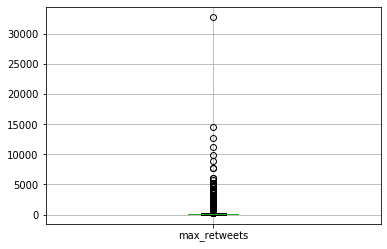

In [62]:
boxplot = one_week.boxplot(column=['max_retweets'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12728a550>]],
      dtype=object)

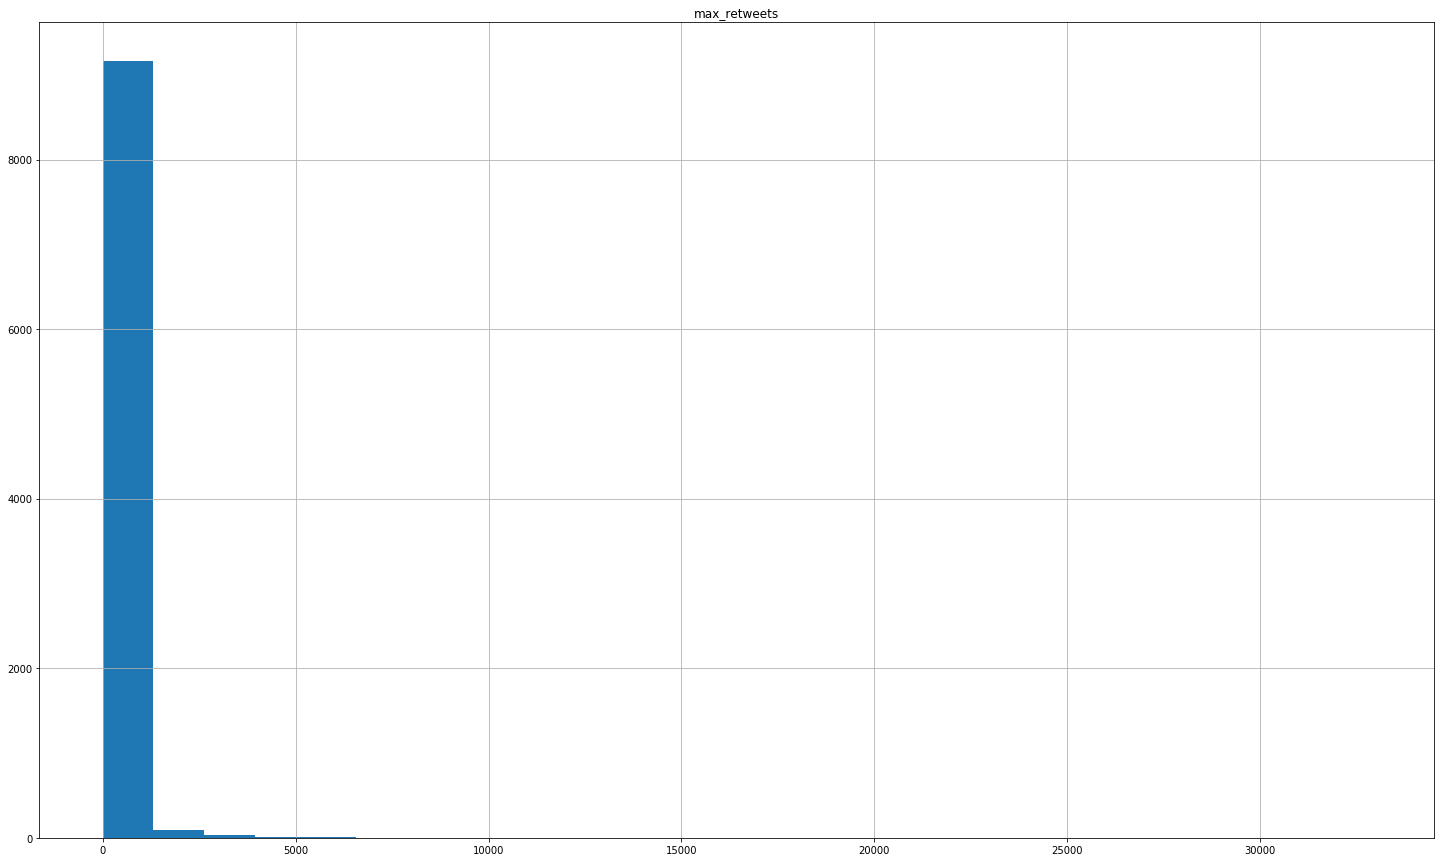

In [77]:
one_week.hist(column='max_retweets', bins=25, figsize=(25,15))

In [55]:
# Remove outliers
q_low = one_week["max_retweets"].quantile(0.01)
q_hi  = one_week["max_retweets"].quantile(0.99)
one_week_filtered = one_week[(one_week["max_retweets"] < q_hi) & (one_week["max_retweets"] > q_low)]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12668fd90>]],
      dtype=object)

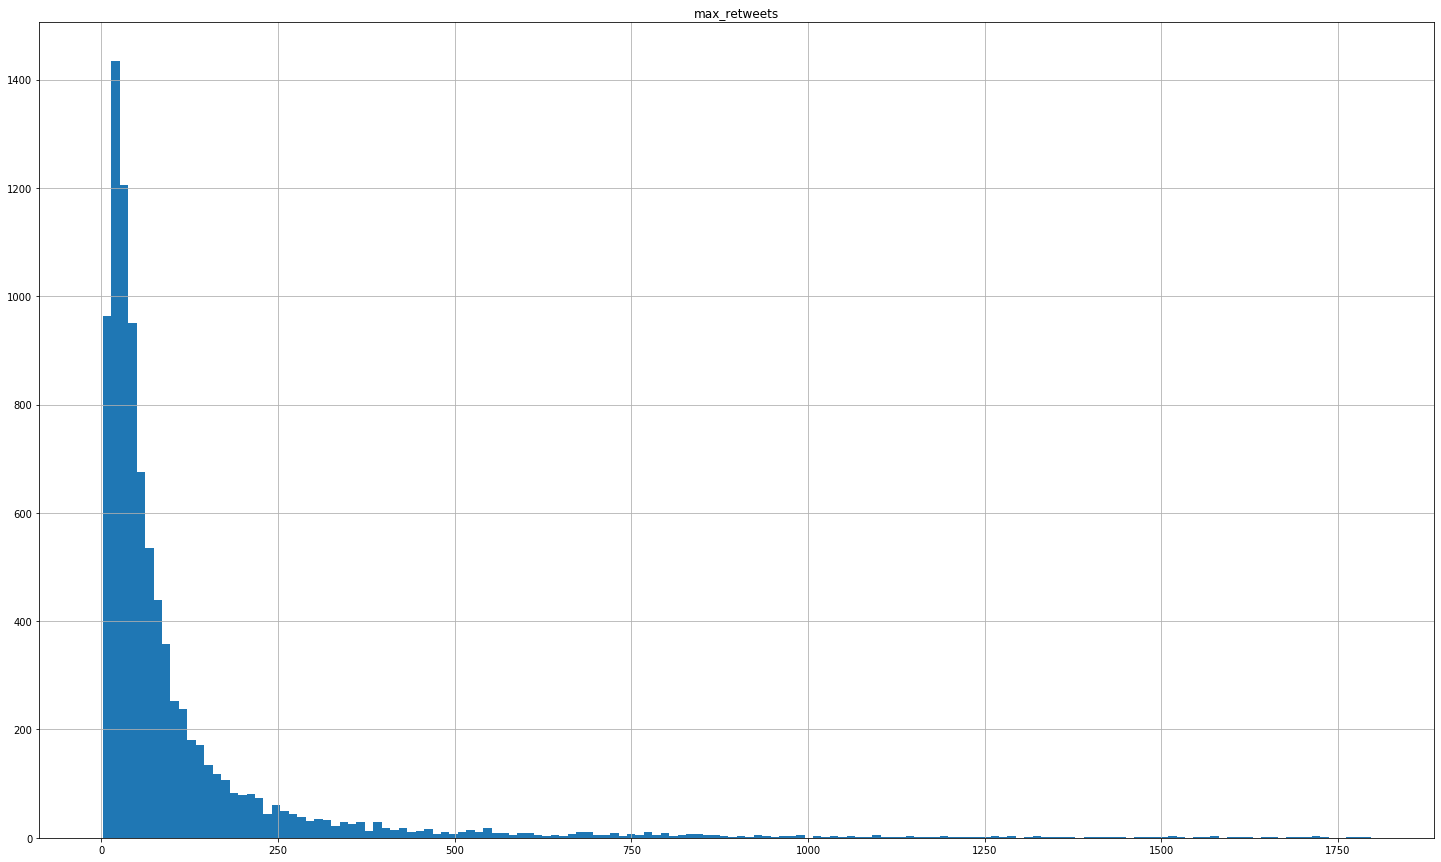

In [69]:
one_week_filtered.hist(column='max_retweets', bins=150, figsize=(25,15))

In [134]:
accounts = ["CNN","The Wall Street Journal","The Washington Post","NBC News",
            "The Associated Press","ABC News","Los Angeles Times","The New York Times","NPR","TIME","U.S. News","USA TODAY",
            "Fox News","Reuters","HuffPost"]
outlet_lists = {}
for outlet in accounts:
    outlet_lists[outlet] = []

In [137]:
for index, row in one_week.iterrows():
    outlet_lists[row["screen_name"]].append(row["max_retweets"])
outlet_lists

{'CNN': [682,
  833,
  542,
  936,
  386,
  275,
  149,
  426,
  190,
  156,
  1603,
  493,
  2210,
  2300,
  2509,
  298,
  330,
  360,
  1797,
  249,
  63,
  953,
  370,
  108,
  274,
  225,
  198,
  279,
  93,
  155,
  412,
  123,
  217,
  185,
  133,
  140,
  32,
  1095,
  848,
  282,
  342,
  143,
  73,
  175,
  70,
  209,
  126,
  266,
  206,
  544,
  480,
  623,
  114,
  127,
  452,
  111,
  73,
  97,
  68,
  83,
  125,
  406,
  90,
  195,
  147,
  94,
  1046,
  79,
  193,
  79,
  260,
  272,
  138,
  81,
  20,
  224,
  46,
  57,
  462,
  241,
  791,
  164,
  177,
  77,
  1206,
  101,
  61,
  106,
  216,
  249,
  117,
  138,
  220,
  347,
  198,
  122,
  139,
  602,
  48,
  504,
  722,
  771,
  731,
  175,
  459,
  245,
  85,
  113,
  703,
  264,
  113,
  320,
  167,
  1174,
  217,
  242,
  308,
  236,
  166,
  96,
  197,
  41,
  67,
  362,
  975,
  134,
  211,
  676,
  147,
  61,
  193,
  64,
  111,
  135,
  1116,
  58,
  99,
  348,
  220,
  23,
  165,
  144,
  59,
  236,
  270

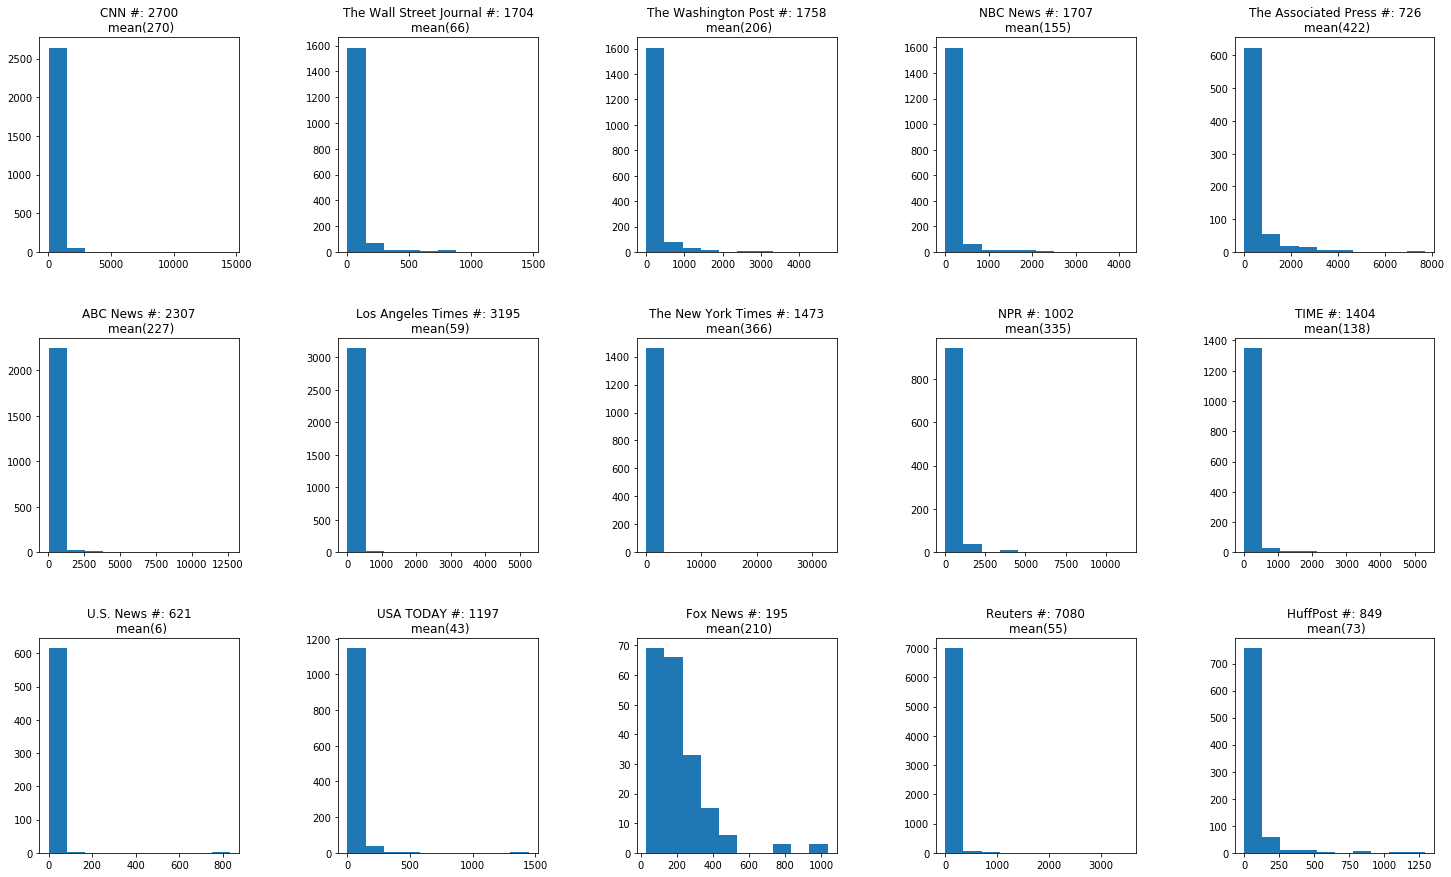

In [176]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1

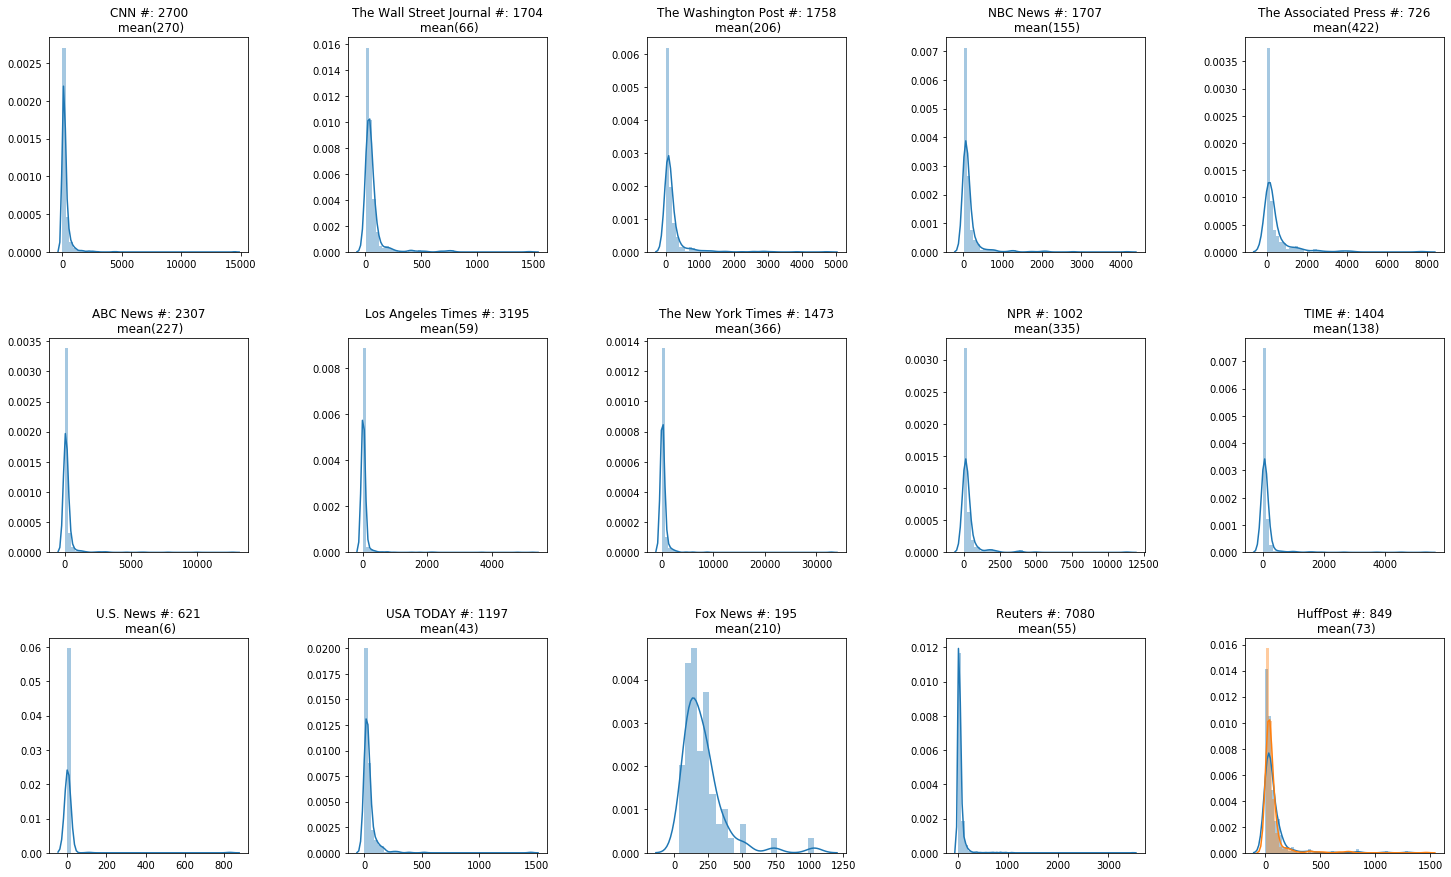

In [180]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    sns.distplot(value, ax=ax)
    #ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1
sns.distplot(outlet_lists["The Wall Street Journal"])